Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File path: /content/drive/MyDrive/Colab Notebooks/A_Z Handwritten Data.csv
Shape of Dataset: (372450, 785)
A : 13869
B : 8668
C : 23409
D : 10134
E : 11440
F : 1163
G : 5762
H : 7218
I : 1120
J : 8493
K : 5603
L : 11586
M : 12336
N : 19010
O : 57825
P : 19341
Q : 5812
R : 11566
S : 48419
T : 22495
U : 29008
V : 4182
W : 10784
X : 6272
Y : 10859
Z : 6076


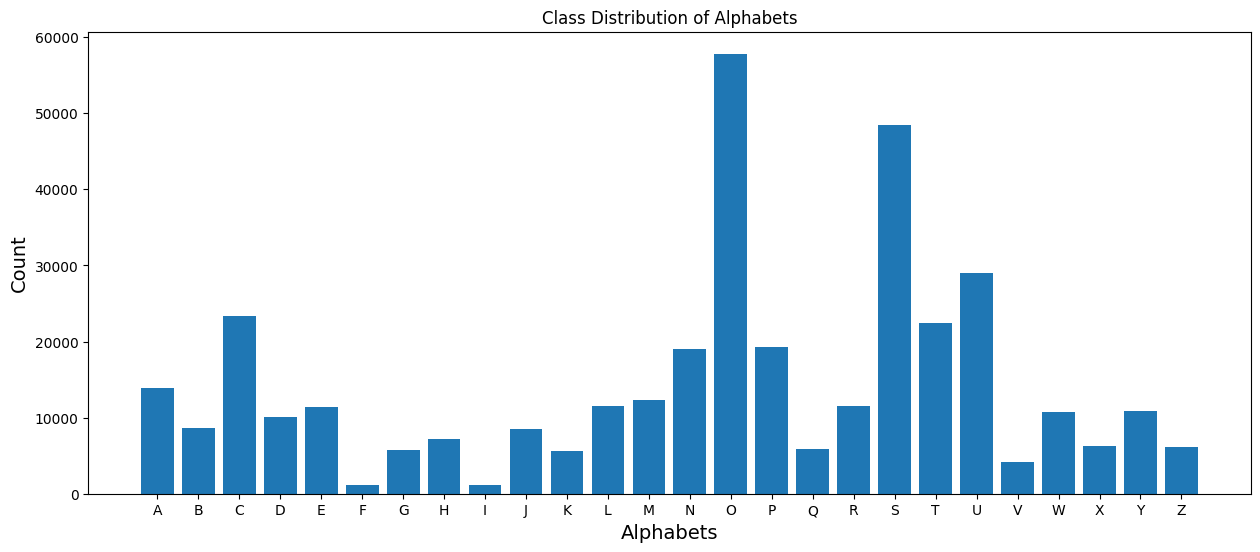

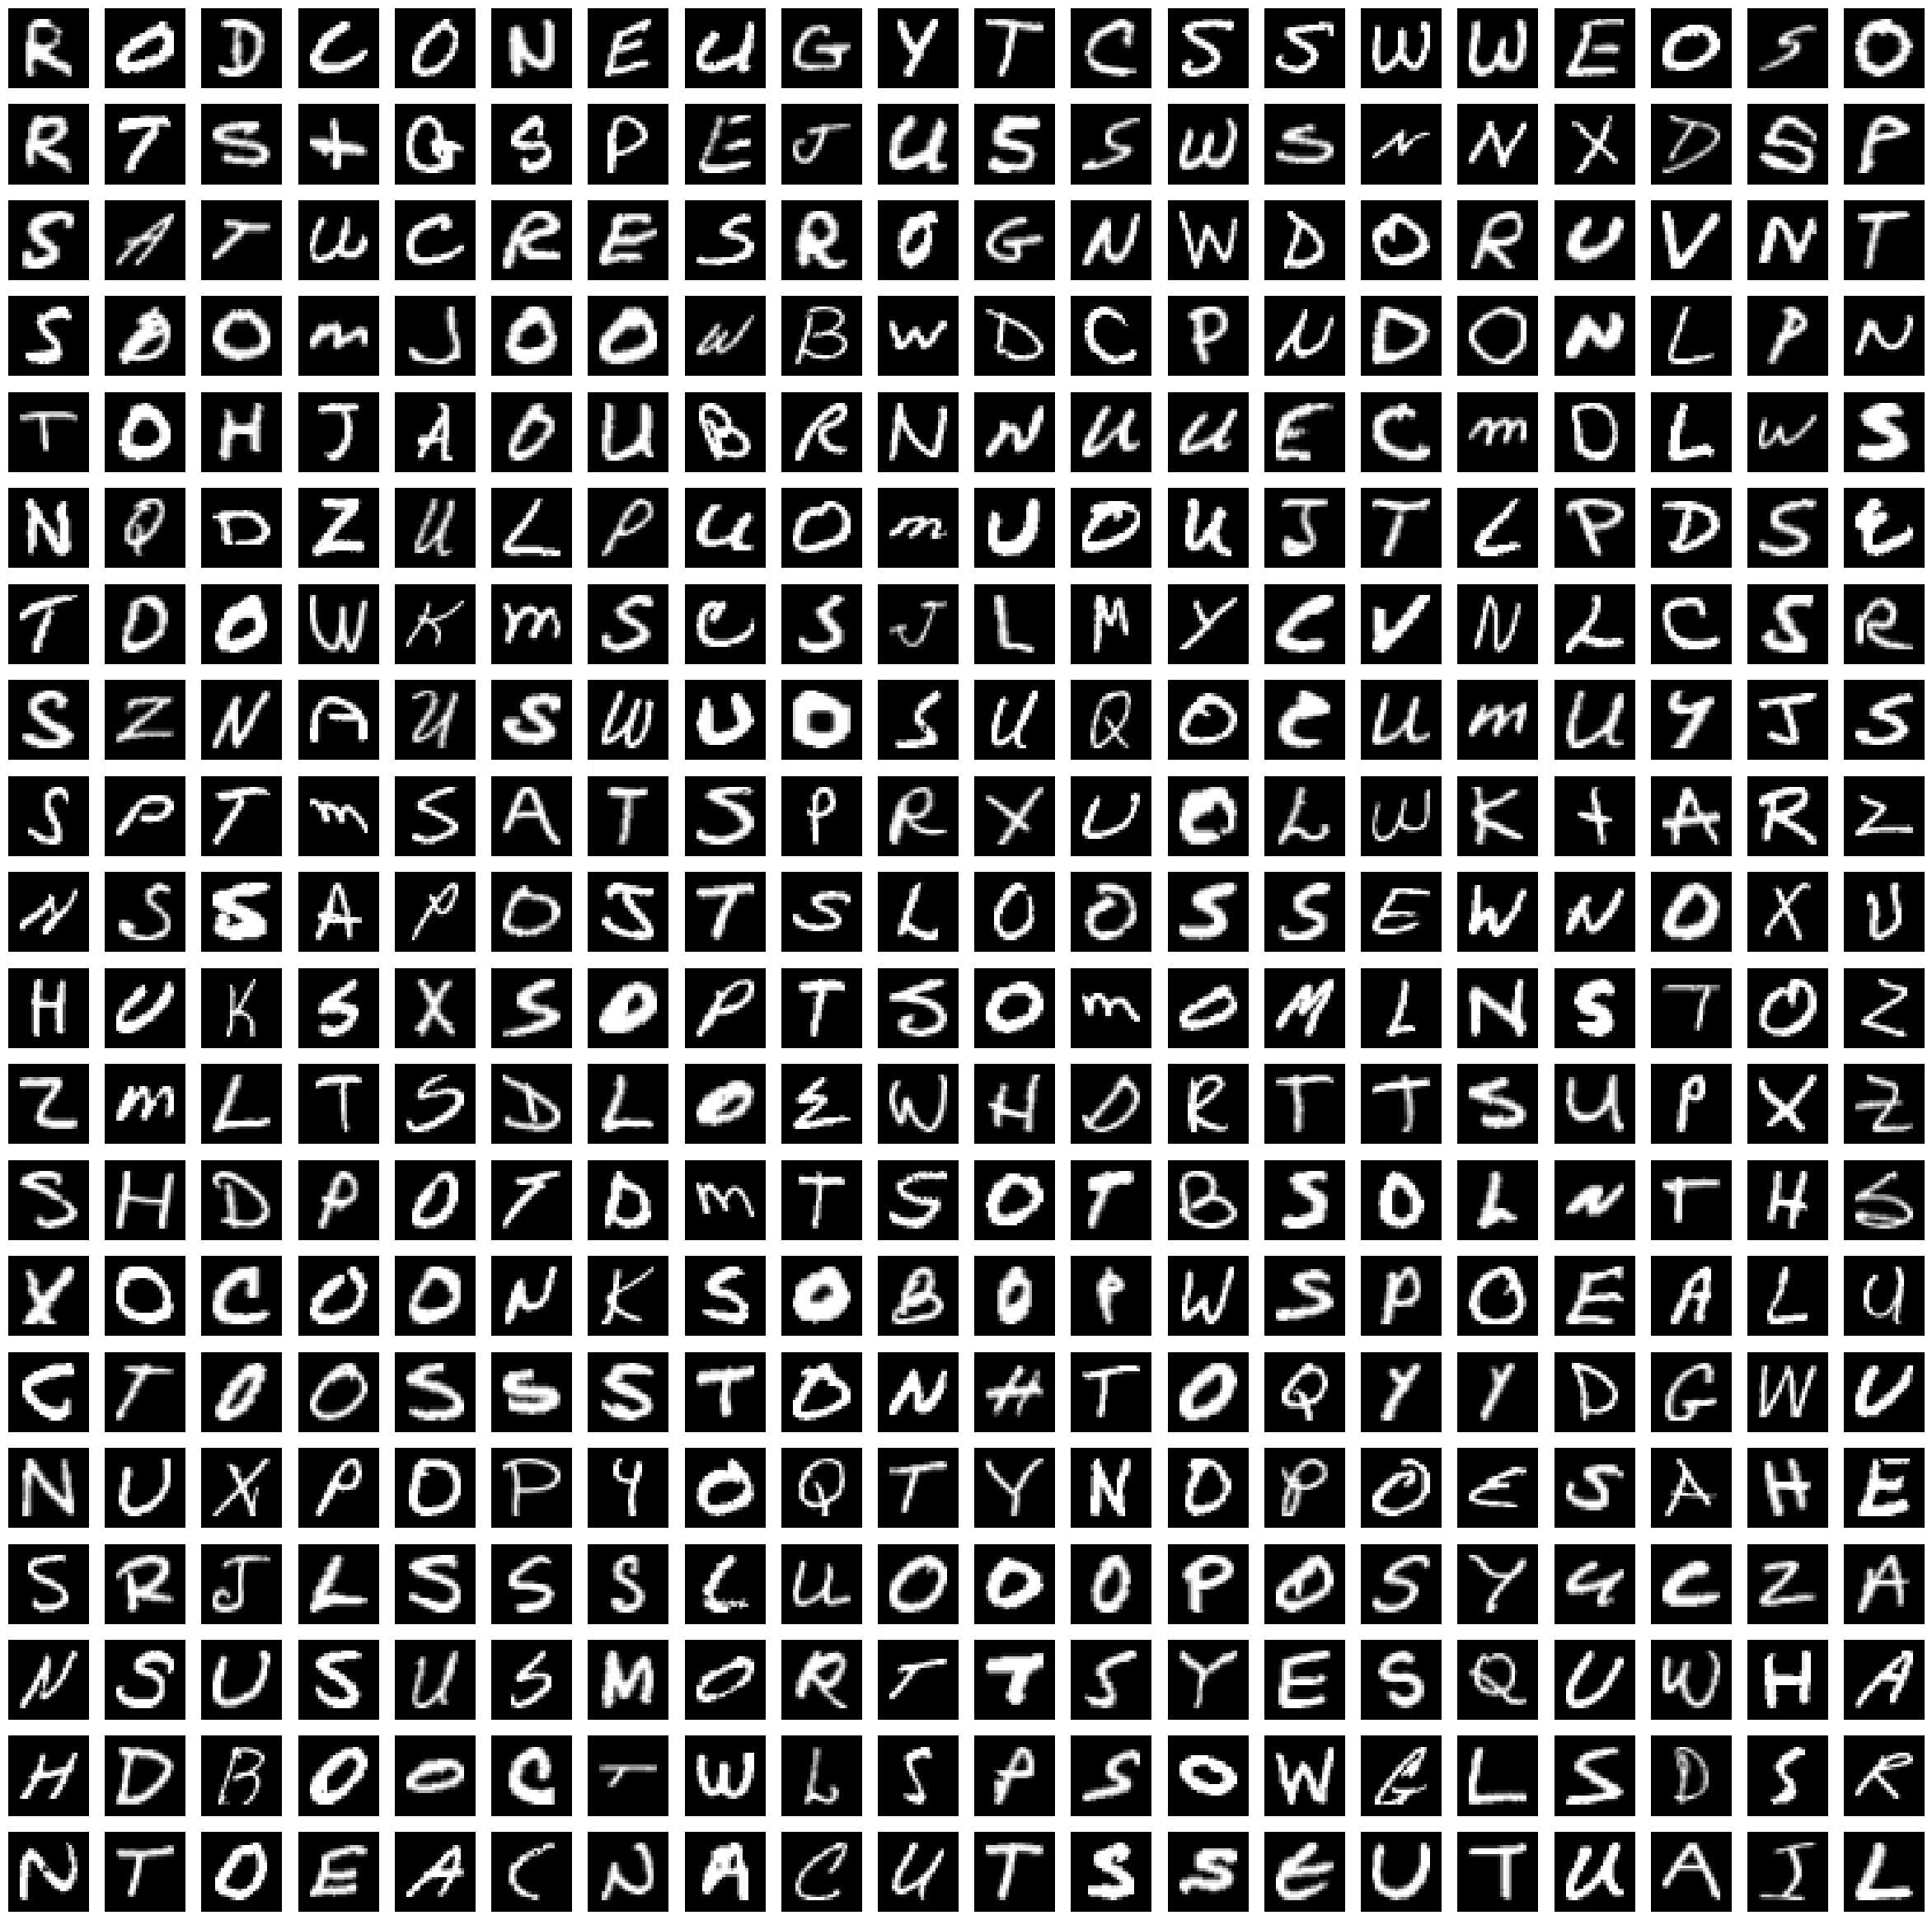

Train Set Shape: (368725, 28, 28, 1)
Test Set Shape: (3725, 28, 28, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 26)                  │           1,690 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 471,294 (1.80 MB)

 Trainable params: 471,038 (1.80 MB)

 Non-trainable params: 256 (1.00 KB)

   3/3319 ━━━━━━━━━━━━━━━━━━━━ 1:01:08 1s/step - accuracy: 0.0706 - loss: 3.6857

In [ ]:
# Import Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import cv2

# Mount Google Drive (Opsional jika file di Google Drive)
from google.colab import drive
drive.mount('/content/drive')

# Load Dataset
file_path = os.path.join('/content', 'drive', 'MyDrive', 'Colab Notebooks', 'A_Z Handwritten Data.csv')  # Updated file path

# Print the file path to verify if it's correct
print("File path:", file_path)  # Added this line for debugging

# Check if the file exists before attempting to read it
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    print(f"Error: File not found at {file_path}")
    # Exit the script or handle the error appropriately
    # For example, you can raise an exception or prompt the user for a different file path

# Dataset Shape
print("Shape of Dataset:", df.shape)

# Convert Dataset to Numpy Array and Reshape
data_array = np.array(df, dtype=np.uint8)
del df  # Release memory

labels = data_array[:, 0]  # Labels (Alphabet Index)
x = data_array[:, 1:].reshape(-1, 28, 28) / 255.0  # Normalize pixel values
del data_array  # Release memory

# Check Class Distribution
alpha = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')  # Alphabet Labels
unique, counts = np.unique(labels, return_counts=True)
list_alpha = list(zip(alpha, counts))
for i in list_alpha:
    print(i[0], ':', i[1])

# Bar Plot of Class Distribution
plt.figure(figsize=(15, 6))
plt.bar(alpha, counts)
plt.xlabel('Alphabets', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Class Distribution of Alphabets')
plt.show()

# Visualize Sample Images
sample_indices = np.random.randint(0, len(x), size=400)
plt.figure(figsize=(30, 30))
for i, idx in enumerate(sample_indices, 1):
    plt.subplot(20, 20, i)
    plt.imshow(x[idx], cmap='gray')
    plt.axis('off')
plt.show()

# Split Dataset into Train and Test Sets
from sklearn.model_selection import train_test_split

x = x.reshape(-1, 28, 28, 1)  # Add channel dimension
x_train, x_test, y_train, y_test = train_test_split(x, labels, test_size=0.01, random_state=42)

print("Train Set Shape:", x_train.shape)
print("Test Set Shape:", x_test.shape)

# Build Model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping

model = Sequential([
    Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1), padding='same'),
    Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(100, activation='relu', kernel_initializer='he_uniform'),
    Dropout(0.1),
    Dense(64, activation='relu', kernel_initializer='he_uniform'),
    Dropout(0.125),
    BatchNormalization(),
    Dense(26, activation='softmax')
])

model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train Model with Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(x_train, y_train, validation_split=0.1, epochs=1, batch_size=100, callbacks=[early_stop])

# Plot Loss and Accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()

# Evaluate Model
metrics = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {metrics[1] * 100:.2f}%")
print(f"Test Loss: {metrics[0]:.2f}")

# Simpan dan Muat Model
model.save(os.path.join('/content', 'drive', 'MyDrive', 'Colab Notebooks', 'Alphabet_Recognition.h5'))  # Gunakan os.path.join untuk membuat jalur file lengkap
model = tf.keras.models.load_model(os.path.join('/content', 'drive', 'MyDrive', 'Colab Notebooks', 'Alphabet_Recognition.h5'))  # Gunakan os.path.join untuk memuat juga

# Test Model with Random Samples
def test_images(n=25):
    indices = np.random.randint(0, len(x_test), size=n)
    plt.figure(figsize=(15, 15))
    for i, idx in enumerate(indices, 1):
        pred = model.predict(x_test[idx].reshape(1, 28, 28, 1))
        pred_label = alpha[np.argmax(pred)]
        actual_label = alpha[y_test[idx]]
        plt.subplot(5, 5, i)
        plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
        plt.title(f"Pred: {pred_label}\nActual: {actual_label}", color='green' if pred_label == actual_label else 'red')
        plt.axis('off')
    plt.show()

test_images()

# Alphabet Recognition Function for External Images
def alphabet_recognize(filepath):
    image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    _, thresh = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    preprocessed_digits = []
    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        digit = thresh[y:y+h, x:x+w]
        resized_digit = cv2.resize(digit, (18, 18))
        padded_digit = np.pad(resized_digit, ((5, 5), (5, 5)), 'constant', constant_values=0)
        preprocessed_digits.append(padded_digit)

    plt.figure(figsize=(15, 5))
    recognized_alphabets = []
    for digit in preprocessed_digits:
        pred = model.predict(digit.reshape(1, 28, 28, 1) / 255.0)
        pred_label = alpha[np.argmax(pred)]
        recognized_alphabets.append(pred_label)
        plt.subplot(1, len(preprocessed_digits), len(recognized_alphabets))
        plt.imshow(digit, cmap='gray')
        plt.title(pred_label, color='green', fontsize=14)
        plt.axis('off')
    plt.show()
    print("Recognized Alphabets:", recognized_alphabets)

# Test Alphabet Recognition on an Image
# Combine the file path components using os.path.join
image_path = os.path.join('/content', 'drive', 'MyDrive', 'Colab Notebooks', '2.jpg')
alphabet_recognize(image_path)